<center>
    <h1> 
        Teste de Hipótese 1.7: Visualização das Histogramas das Amostras no Formato HSV e as Médias das Matizes
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>No teste 1.6 foi possível verificar que a equalização da saturação e do "valor" no formato HSV + ganho percentual apresentou resultados parecidos com a equalização dos canasi RGB + ganho percentual. Nesse teste, vamos terminar de verificar se há algum padrão de que distingue os tipos de documentos e também das amostras boas das ruins, em caso positivo, podemos aderir o padrão HSV na solução.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação das médias dos histogramas dos documentos <br>
2. Calculando a média da matiz(hue) das amostras apartir do formato HSV  <br>
3. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Comparação das médias dos histogramas dos documentos

In [3]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['rg_frente','rg_tras','cnh_frente','cnh_tras']

In [7]:
# Laço para repetir o processos anteriores de um vez para todos as amostras boas
medias = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_bons = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))
        docs_bons.append(doc[i])
        
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_hue = 0
    sum_sat = 0
    sum_val = 0
    
    for i in range(len(doc)):
        sum_hue += doc[i][0]
        sum_sat += doc[i][1]
        sum_val += doc[i][2]
        
    sum_hue = sum_hue/len(doc)
    sum_sat = sum_sat/len(doc)
    sum_val = sum_val/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_hue, sum_sat, sum_val]}

In [8]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_hue = 0
    sum_sat = 0
    sum_val = 0
    
    for i in range(len(doc)):
        sum_hue += doc[i][0]
        sum_sat += doc[i][1]
        sum_val += doc[i][2]
        
    sum_hue = sum_hue/len(doc)
    sum_sat = sum_sat/len(doc)
    sum_val = sum_val/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_hue, sum_sat, sum_val]}

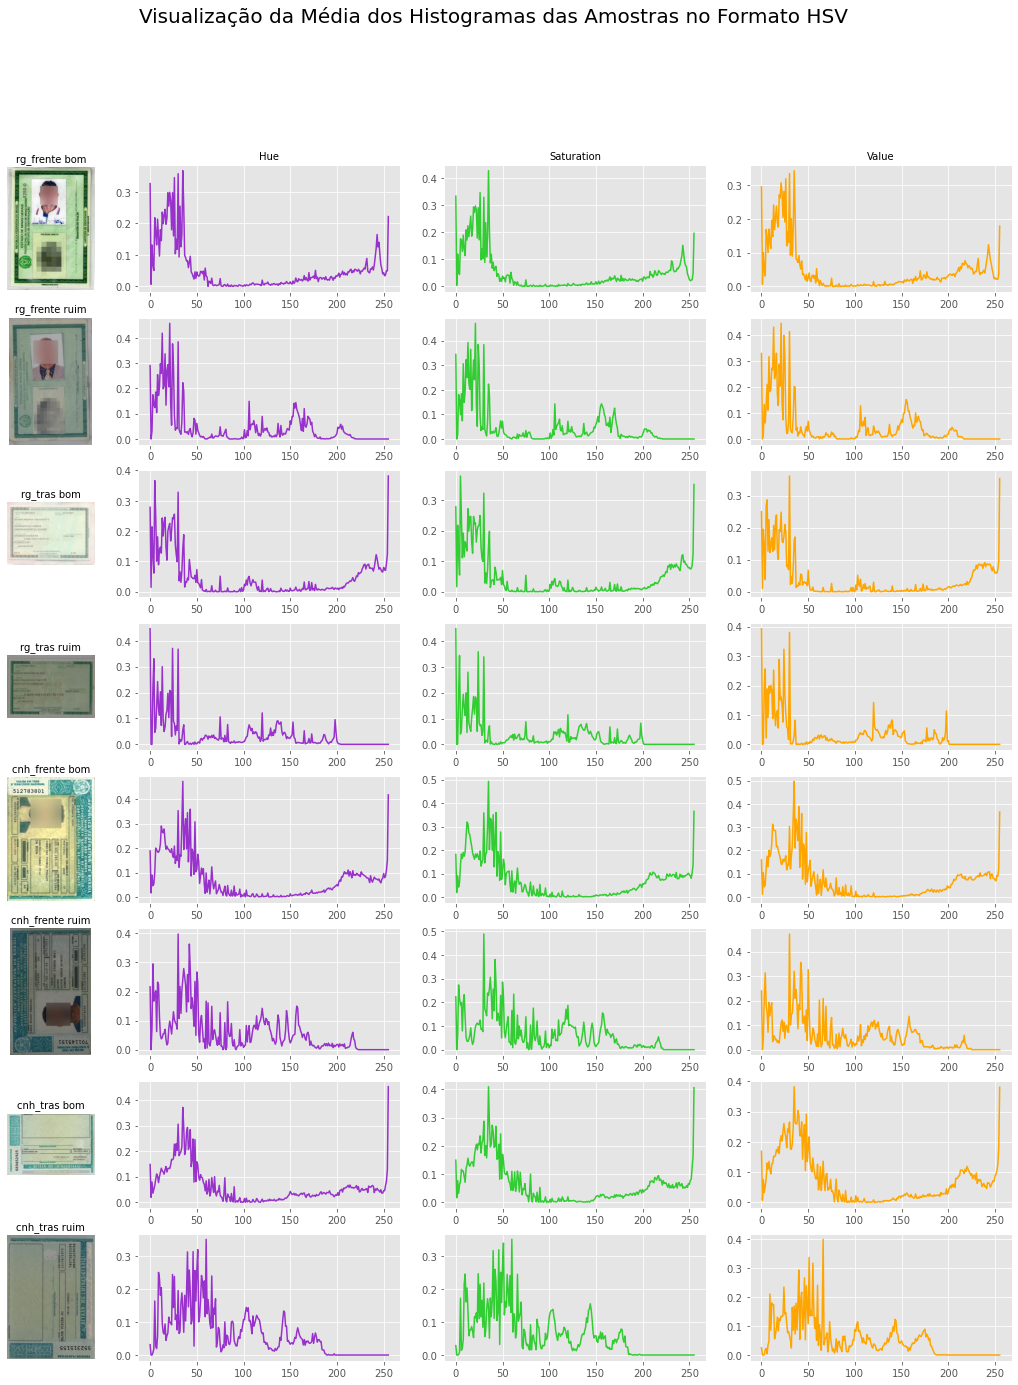

In [12]:
# Plot análogo ao anterior
n = len(medias.keys()) + len(medias2.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n-2), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for i,doc in zip(range(0,n,2),documentos):
    ax[0+(i)].imshow(medias[doc]['matrix']); 
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10)

    
    ax[n+(i)].plot(medias[doc]['hist'][0], color='darkorchid')
    ax[n*2+(i)].plot(medias[doc]['hist'][1], color='limegreen')
    ax[n*3+(i)].plot(medias[doc]['hist'][2], color='orange')
    if(i == 0): 
        ax[n*3+(i)].set_title('Value',fontsize=10)
        ax[n+(i)].set_title('Hue',fontsize=10)
        ax[n*2+(i)].set_title('Saturation',fontsize=10)
        
    ax[0+(i+1)].imshow(medias2[doc]['matrix']); 
    ax[0+(i+1)].axis('off'); ax[0+(i+1)].set_title(doc + ' ruim',fontsize=10)

    ax[n+(i+1)].plot(medias2[doc]['hist'][0], color='darkorchid');
    ax[n*2+(i+1)].plot(medias2[doc]['hist'][1], color='limegreen')
    ax[n*3+(i+1)].plot(medias2[doc]['hist'][2], color='orange')
    
fig.suptitle('Visualização da Média dos Histogramas das Amostras no Formato HSV', fontsize=20)
plt.show()

Não apresentam padrões facilmente distinguiveis entre os documentos.

# 2. Calculando a média da matiz(hue) das amostras apartir do formato HSV

In [13]:
# Convertendo as amostras em HSV
hsv_bons = []
hsv_ruins = []

for k in docs_bons:
    hsv_bons.append(cv2.cvtColor(k, cv2.COLOR_RGB2HSV))
    
for k in docs_ruins:
    hsv_ruins.append(cv2.cvtColor(k, cv2.COLOR_RGB2HSV))

In [14]:
# Calculando as médias de saturação de cada imagem
media_hue_bons = []
media_hue_ruins = []

for h in hsv_bons:
    H, _, _ =  cv2.split(h)
    media_hue_bons.append(np.mean(H))
    
for h in hsv_ruins:
    H, _, _ =  cv2.split(h)
    media_hue_ruins.append(np.mean(H))

In [15]:
# Calculando a média total de saturação de cada tipo de documento
media_hue_final_ruins = []
media_hue_final_bons = []

for i in range(len(documentos)):
    media_hue_final_ruins.append(np.mean(media_hue_ruins[7*i:7*(i+1)])) # [7*i:7*(i+1)] iterar sobre o fatiamento
    media_hue_final_bons.append(np.mean(media_hue_bons[20*i:20*(i+1)]))

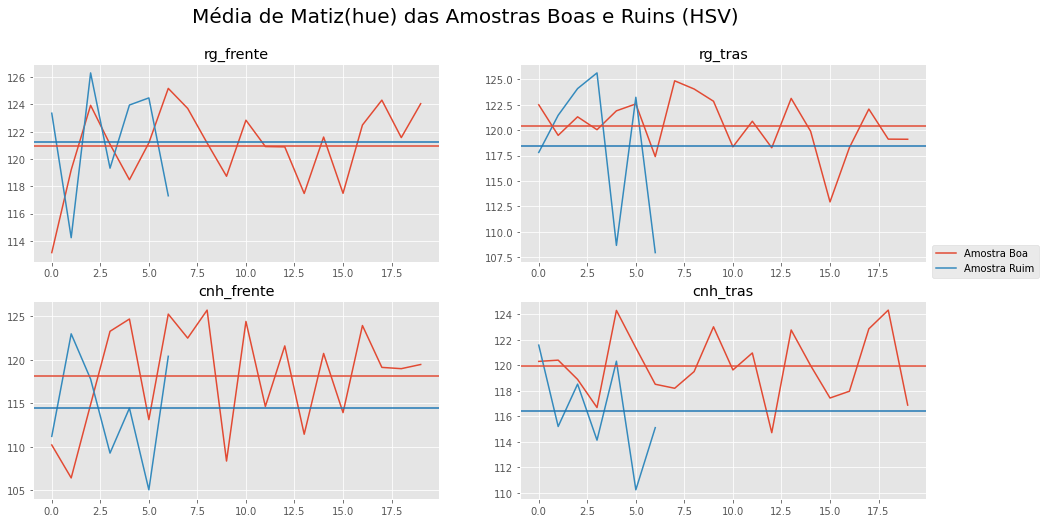

In [16]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
    
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_hue_bons[20*i:20*(i+1)]) # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_hue_ruins[7*i:7*(i+1)])   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_hue_final_ruins[i], c='tab:blue')
    plt.axhline(media_hue_final_bons[i])
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de Matiz(hue) das Amostras Boas e Ruins (HSV)', fontsize=20)
plt.show();

Podemos ver que as médias são bem próximas. <br>
Obs.: Como estou utilizando um dataset amostral e não o completo, nele não havia tantas amostras ruins, então foi utilizado somente 7 amostras em cada, por essa razão os pontos azuis acabam antes.

# 3. Conclusão

Nesse teste vimos que os histogramas dos documentos no formato HSV não apresentam padrões facilmente distinguíveis pois os histogramas vistos são somemente as médias, consequentemente os histogramas das amostras são mais indistinguíveis ainda. É possível notar facilmente apenas que os histogramas das amostras possuem poucos valores entre 200 e 250, enquanto nas amostras boas há um certo relevo. Avaliar a mediana para o caso da matiz também pode ser oportuno, mas não é dificil notar que nesse caso não encontrariamos achados interessantes. Podemos concluir que a utilização dos histogramas do formato HSV não oferem vantagem para a distinção dos documentos em relação aos histogramas dos canais de cores do RGB.

Obs.: Os cps não foram utilizados nessa análise por avaliar que eles já são mais facilmente separáveis.

---


img = cv2.cvtColor(cv2.imread('amostras_boas/rg_frente/rg_frente (1).jpg'), cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(cv2.cvtColor(cv2.imread('amostras_ruins/rg_frente/rg_frente (1).jpg'), cv2.COLOR_BGR2HLS))
S = S + 30
V = V + 30
img2 = cv2.cvtColor(cv2.merge([H, S, V]), cv2.COLOR_HLS2RGB)
img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(img2)

plt.imshow(img)